# Python很好用的技巧
## 查询某一个对象的方法
* help(str)
* dir(str)

## 查询库里面的函数
* import package  dir(package)
* import package  help(package)

# 第二周 Python面面观
## 2.7 变量作用域
* 全局变量：在程序主体为全局变量
* 局部变量： 在函数内部为局部变量

## Python常用标准库函数
* 内建函数、标准库函数、第三方库函数
1. math
2. os
3. random
4. datatime


In [41]:
# 2.7 变量作用域
## 在函数内部修改全局变量
def g1(x):
    global a # 代表全局变量进入里面，但是我不建议这样做
    print("a ={}".format(a))
    a=5 
    print(a+x)
a =1
g1(8)
print(a) # 显示结果被改变

a =1
13
5


In [42]:
# Python常用标准库函数
import math
help(math)

Help on module math:

NAME
    math

MODULE REFERENCE
    https://docs.python.org/3.7/library/math
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
    

# 第三周：数据的获取与表示
## 3.1 本地数据的获取
1. 打开文件
    1. file_obj= open(filename, mode='r', buffering=-1, ...)
        * mode为可选参数，默认值为r
            * r = read
            * w = write
            * a = append
            ![image](readlocalfile1.png)
        * buffering也为可选参数，默认值为-1（0代表不缓冲，1或大于1的值表示缓冲一行或指定缓冲区大小）
            * 二进制文件可以不需要缓冲，可以设置为0
    2.返回的对象是一个**文件（file）对象**
        * 文件对象可以**迭代**
        * 有关闭和读写文件的相关**方法和属性**
        
2. 读写文件
    1. 写一个文件
        1. 打开文件的时候，mode='w'
        2. f.write() ,写入字符串
        3. f.writelines(),写入多行数据
    2. 读一个文件
        1. 打开文件的时候，mode='r'
        2. f.read(size)
            * size参数可选，不使用的时候，直接读整个文件，返回**一个字符串**
            * 有size参数的时候，至多选择size字节的文件内容，返回**一个字符串**
                * 一个英文字母是一个size大小
        3. f.readlines()
            * 读取全部内容
            * 返回一个列表，列表里面的内容是每一行的内容，包括换行符\n
        4. f.readline()
            * 读取单行内容
            * 注意句柄的变化，会持续往下走，不是从该文件的开头
    3. ![读文件内容](readfilecontent.png)
        1. 第二个读取会跟随第一个读取，继续读取，不是从头读取
3. 关闭文件
    * f.close()
    * 如果用with开头，则会自动关闭文件
4. 常见写法
    1. 写文件
    ![写入本地文件](readlocalfile.png)
5. 文件执政
    1. f.seek(offset,whence=0)
    * offset:偏移字节
        * "abcdefgh" offset=3,从d开始
    * whence：起始位置
    * 一般用法 f.seek(0),表示回到文件头部

In [4]:
# readlines读取数据测试
with open("companies.txt",mode='r') as f:
          cNames = f.readlines()
print(cNames) 
# result shows ； ['"apple"\n', '"IBM"\n', '"lenove"\n', '"阿里巴巴"']

['"apple"\n', '"IBM"\n', '"lenove"\n', '"阿里巴巴"']


In [5]:
# read() 返回一个字符串，不包含换行符
with open("companies.txt",mode='r') as f:
          cNames = f.read()
print(cNames) 

"apple"
"IBM"
"lenove"
"阿里巴巴"


In [6]:
# readline() 返回一个第一行的字符串，且不包含换行符
with open("companies.txt",mode='r') as f:
          cNames = f.readline()
print(cNames) 

"apple"



In [8]:
# 每一列前面加上序号
## 打开文件
## 读取文件
## 写入文件，一次性写入
with open("companies.txt",mode='r') as f:
    datas = f.readlines()
for i in range(len(datas)):
    datas[i] = str(i)+datas[i]

with open("newcomoanies.txt",mode='w') as f1:
    f1.writelines(datas)


In [13]:
#读取文件的行数
def readlines1(fname):
    try:
        with open(fname,mode='r') as f:
            datas = f.readlines()
    except FileNotFoundError:
        print(fname+"is not found")
    lens = len(datas)
    print(fname+"is {} row".format(lens))
fname = input("please enter filename:")
readlines1(fname)

please enter filename:companies.txt
companies.txtis 4 row


In [14]:
# 文件路径的问题
#读取文件的行数
def readlines1(fname):
    try:
        with open(fname,mode='r') as f:
            datas = f.readlines()
    except FileNotFoundError:
        print(fname+"is not found")
    lens = len(datas)
    print(fname+"is {} row".format(lens))
fname = input("please enter filename:")
readlines1(fname)
#上一级文件 
"../word论文技巧.ipynb"
# 当前目录
"./text"

please enter filename:../word论文技巧.ipynb
../word论文技巧.ipynbis 79 row


'../word论文技巧.ipynb'

In [21]:
# 运用os模块
import os
import shutil
def countLines(fname):
    try:
        with open(fname) as f:
            data = f.readlines()
    except FileNotFoundError:
        print(fname+"dose not exit")
    lens = len(data)
    print(fname)
    print(fname.split("/")[-1]+"has"+str(lens)+"lines")
path = "../course_python_usingdata"
for fname in os.listdir(path):
    if fname.endswith(".txt"):
        file_path = os.path.join(path,fname)
        countLines(file_path)
        
        if os.path.exists('./output'): # 若存在文件路径
            shutil.rmtree("./output") #递归删除该文件路径
            
        os.mkdir("./output")

../course_python_usingdata/companies.txt
companies.txthas4lines
../course_python_usingdata/newcomoanies.txt
newcomoanies.txthas4lines


# 获取网页数据
## 抓取
    1. requests
        * [request](http://www.python-requests.org/)
        * 得到的response对象
            * 包含request信息和response信息
            * request会自动解码网页信息
                * json 》》 re.json()
                * 二进制》》re.content
                * re.text
                * 修改编码 re.encoding = "utf-8"
    2. scrapy框架
    ![request-response](request_response.png)
    
## 解析
    1. beautifulsoup
        * 从html文件或XML文件提取数据
        * 使用于标签化模块
    2. re
    
## 第三方API一套流程

In [ ]:
# request   a practise
## 先检查网站的爬虫协议
###robots.txt   https://www.douban.com/robots.txt ，注意edisbel和延迟。
import requests
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36'}
r = requests.get("https://book.douban.com/subject/1007305/",headers=headers)
#https://money.cnn.com/data/dow30/
#返回状态码，观察是够正常
r.status_code

# 返回页面内容
r.text

In [ ]:
#beautifulsoup的基本使用

In [3]:
# 加载数据
import numpy as np
import pandas as pd
data = pd.read_csv("GTD_tags.csv")
data.head()

/root/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,country,country_txt,region,region_txt,city,summary,crit1,crit2,crit3,...,weaptype3_txt,weaptype4,weaptype4_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt
0,197000000001,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,1,1,1,...,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN
1,197000000002,130,Mexico,1,North America,Mexico city,NaN,1,1,1,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
2,197001000001,160,Philippines,5,Southeast Asia,Unknown,NaN,1,1,1,...,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN
3,197001000002,78,Greece,8,Western Europe,Athens,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,197001000003,101,Japan,4,East Asia,Fukouka,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


# 第三周 强大的数据结构与Python的扩展库
## 4.1 为什么需要字典
## 4.2 字典的使用
## 4.3 集合
## 4.4 拓展库SciPy
## 4.5 ndarray
## 4.6 变长字典ndarray
## 4.7 DataFrame
## 拓展：字典和集合编程实例
## numpy常见应用选将

In [8]:
# numpy常见应用选将
## 创建一个全一的数组
import numpy as np
x = np.ones((10,10))
x

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [10]:
# 内部区域为0，通过切片
x[1:-1,1:-1]=0
x
#

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [12]:
# np中的full更厉害
y = np.full((10,10),np.pi)
y

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
        3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
        3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
        3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
        3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
        3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
        3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
        3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.1415926

In [16]:
# ones zeros full由一组特殊的函数
# np.ones_like()，直接得到相同形状
X = np.array([[1,2,3],[4,5,6]],dtype= np.float64)
np.full_like(X,4) # 

array([[4., 4., 4.],
       [4., 4., 4.]])

In [20]:
# 如何创建一个单位数组
## identty eye ，其中eye更灵活
np.identity(10)
np.eye(10)
np.eye(10,k=1) # {k>0:对角线上移，k<0:对角线下移}

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
# 从正态分布中采样
X = np.random.normal(0,5,100)
X
# 从均匀均匀分布采样
Y = np.random.uniform(-5,5,100)

In [26]:
# 从已有数据中采样放回后者不放回
A= np.random.rand(3,5) 
mask = np.random.choice(np.arange(A.shape[0]),2,replace=True) #replace=True代表 有放回抽样
print("mask:{}".format(mask)) #对行数采样
A[mask]

mask:[1 1]


array([[0.06579995, 0.69787007, 0.12487626, 0.79722079, 0.35092507],
       [0.06579995, 0.69787007, 0.12487626, 0.79722079, 0.35092507]])

In [30]:
#Numpy中的布尔索引问题
## 一般是先比较，生成布尔，之后根据布尔索引
X = np.arange(0,101)
# 获取小于50的数字
X[X<=50]
# 获取小于50的偶数
X[(X<=50)&(X%2==0)]
# 获取小于50或者为偶数的值
X[(X<=50)|(X%2==0)]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [31]:
# 筛选数组之后修改
## 修改原始数组
X[X<=50] =1
##  where方法,条件为真的时候-1，条件为假的时候，原始数据
np.where(X%2==0,-1,X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       51, -1, 53, -1, 55, -1, 57, -1, 59, -1, 61, -1, 63, -1, 65, -1, 67,
       -1, 69, -1, 71, -1, 73, -1, 75, -1, 77, -1, 79, -1, 81, -1, 83, -1,
       85, -1, 87, -1, 89, -1, 91, -1, 93, -1, 95, -1, 97, -1, 99, -1])

In [38]:
# numpy矢量化和广播运算
score = np.array([[70,80,90],[50,60,70]])# 两门课，三位同学的成绩，每一行代表一门课的成绩
score_mean=score.mean(axis=1)# axis=1表示在每一行上面运算
score_mean # 注意这里
score_mean.shape #注意这里编程了一维数组
#score-score_mean# ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

(2,)

In [40]:
# numpy矢量化和广播运算
score = np.array([[70,80,90],[50,60,70]])# 两门课，三位同学的成绩，每一行代表一门课的成绩
score_mean=score.mean(axis=1,keepdims=True)# axis=1表示在每一行上面运算,keepdims用来维持原数组的维度
score_mean # 注意这里
score_mean.shape #注意这里编程了两行一列
score-score_mean

array([[-10.,   0.,  10.],
       [-10.,   0.,  10.]])

# 第五周Python便携数据获取与预处理
数据收集》数据探索与预处理（数据清洗、数据变换、数据规约）》数据分析与挖掘》结果评价》呈现
## 5.1 数据的收集
1. 本地数据
    1. txt文本打开
    2. .csv文件打开
    3. .xlsx文件打开
    4. 数据库打开
2. 网络数据
    1. API获取数据
    2. 一些模块库自带
        1. sklearn模块的datasets
        2. NLTK语料库
3. 从网络爬取到本地
    1. 爬虫

## 5.2 结果展示
    1. Matplotlib绘图
        * 主要用于二维绘图
        * 绘图质量高
    2. pandas绘图
    3. seaborn绘图
    4. pyechart绘图
## 5.3 数据探索与预处理
    1. 数据探索
        * 检查数据错误
        * 了解数据分布特征和内在规律
    2. 数据预处理
        * 数据清洗 Data cleaning
        * 数据集成 Data integration
        * 数据变换 Data transformation
        * 数据规约 Data reduction
    3. 数据清洗
        * 缺失值处理
        * 异常值处理
## 5.4 数据预处理之数据变换-把数据变换成合适的形式
    1. 规范化
        1. 解决哪些影响？
            * 量纲不同
            * 数值范围差异大
        2. 规范化常用方法
            * 最小-最大规范化
            * z-score规范化
            * 小数定标规范化
    2. 连续属性离散化
        1. 方法：
            * 分箱（binning）：等宽法，等频法
            * 聚类
    3. 特征二值化binarization
## 5.5 数据预处理之数据规约
    1. 目的：对属性和数值进行规约获得一个比原数据集的小的多的规约表示，但仍接近原数据的完整性，在规约后数据集上挖掘可产生近乎相同的分析结果
    2. 属性规约：向前选择，向后删除，决策树，PCA
    3. 数值规约：有参方法（回归法，对数线性模型），无参法（直方图，聚类，抽样）
        

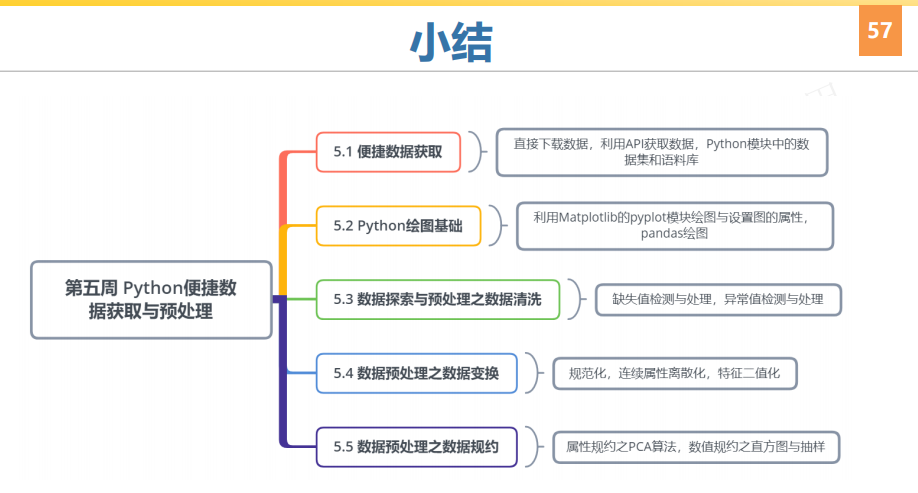

In [44]:
from PIL import Image

im1 = Image.open("week5Portable data acquisition and preprocessing.png")
im1

In [46]:
# 5.1 数据的收集
## 以后补充skitlearn里面的数据
## 网络数据的获取主要放在Python爬虫那一部分学习

In [47]:
# 5.2 结果的展示
## 放在结果展示，Python图像的绘制总结，放在论文中使用


# 5.3 数据探索与预处理
数据探索和数据预处理并没有严格的界限
## 数据探索
1.  检查数据错误 
2. 了解数据分布特征和内在规律

## 数据预处理
1. **数据清洗 data cleaing**
    1. 缺失值处理
        1. 删除
        2. 填充
            1. 固定值
            2. 均值、中位数、众数
            3. 上下数据
            4. 插值函数（如拉格朗日）
            5. 最可能的值（最近邻、回归模型等）
    2. 异常值处理-每一列的异常值
        1. 如何观察异常值
            1. 简单统计
                1. describe
            2. 绘图
                1. boxplot图
            3. 基于密度、最近邻和聚类等方法
                1. 3sigma原则
        2. 如何处理
            1. 同缺失值处理
            2. 局部均值（分箱子）
            3. 不处理
2. 数据集成 data integration
3. **数据变换 data transformation** 把数据变成合适的形式
    1. 规范化
        1. 解决影响
            1. 量纲不同
                1. 身高是cm，体重是kg，数据不好比较
                2. 无量纲操作
            2. 数值范围差异大
        2. 规范化常用方法
            1. 最小-最大规范化-离差标准化
            2. z-score规范化-0均值标准化
            3. 小数定标规范化
    2. 连续属性离散化
        1. 常见方法
            1. 分箱（binning）：等宽法、等频法
            2. 聚类
    3. 特征二值化
        1. 设定一个阈值，threshold
        2. 大于阈值为1，其余为0
        3. 多分类问题变成二分类问题
        4. 例如：电影评分从0-10，经验告诉我们6分以上会推荐，则6分以上变成推荐
        6分以下变成不推荐
4.  **数据规约 data reduction**
    1. 现实中的数据往往有多个列和行，选择最有代表性的行和列，对属性和数值进行规约，获得一个比源数据集的小的多的规约表示，但仍旧接近数据的完整性，在规约后的数据集挖掘课产生近乎相同的分析结果。
    2. 过高维度会带来数据灾难，让样本数据稀疏（出现大量的0），以及距离计算困难等问题
    3. 属性规约：降维度解决数据灾难（属性变少，列变少）
        1. 向前选择
            每次选择一个最优的属性加入，知道选不到最优属性或者满足一定阈值约束后停止。
        2. 先后删除
            从当前属性集中选择一个最差的删除，直到无法删除或者满足一定阈值后停止。
        3. 决策树
            机器学习的专门算法
        4. **PCA**
            1. 主成分分析，最常用的降维分析法，通过某种线性投影将高纬度数据映射到低维空间表示，并且期望在多投影的维度上数据的方差最大。
            2. 选择较少的成分为主成分，忽略对数据描述不重要的成分，并尽可能多的保留原始数据的特征
    4. 数值规约：降低事故数量（行变少）
        1. 有参方法--使用模型来评估数据，只需要存放参数，不需要存放实际的数据
            1. 回归法
            2. 对数线性模型
        2. 无参方法--存放实际的数据
            1. **直方图histogram**
            2. 聚类
            3. **抽样**
    

# 数据预处理-数据清洗
## 缺失值处理

1. 对缺失值处理
    * 查看缺失值情况
    * 删除
    * 填充
        1. 固定值
        2. 均值、中位数、众数
        3. 上下数据
        4. 插值函数（如拉格朗日）
        5. 最可能的值（最近邻、回归模型等）
        
## 异常值处理

2. 异常值处理-每一列的异常值
    1. 如何观察异常值
        1. 简单统计
            1. describe
        2. 绘图
            1. boxplot图
                * 四分卫点
           
        3. 基于密度、最近邻和聚类等方法
            1. 3sigma原则
    2. 如何处理
        1. 同缺失值处理
        2. 局部均值（分箱子）
        3. 不处理
        

# 缺失值处理的Python语言实现

In [48]:
# 查看数据缺失值情况（NAN）
data.isnull() # 每一个位置用布尔表示出来
data.isnull().sum() # 每一类缺失的个数
data.isnull().sum()/data.shape[0] # 看每一列缺失的比例

NameError: name 'data' is not defined

In [49]:
# 删除缺失值
data.drop

NameError: name 'data' is not defined

data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
1. axis  维度的选择
2. how  选择数量
3. thresh  选择数量
3. subset  选择特定的列操作
4. inplace


In [50]:
# 填充缺失值
data.fillna()

NameError: name 'data' is not defined


fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs) 
1. value 
    1. 固定值 
    2. 均值、中位数、众数
2. method 插入上下数据
    1. 插入 前一个的值
    2. 插入后一个的值
    3. 具体实现
        * help(data.fillna)
        * method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.


In [51]:
# B 均值、中位数、众数，，都是针对某一列计算
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()
data1.fillna(data1.mode().iloc[0]) # 众数返回一个dataframe，所以需要取值
data2.fillna(data2.mean())
data3.fillna(data3.median())

NameError: name 'data' is not defined

In [52]:
# 插入前后值
##以后补充

## 课程提及但是没有具体讲解

4. 插值函数（如拉格朗日）以后补充

5. 最可能的值（最近邻、回归模型等）以后补充

# 异常值处理的Python语言实现

In [16]:
#简单统计-dedcribe方法
## 比方说min很小值，则可以看出异常
data1.describe()

,eventid,country,region,crit1,crit2,crit3,doubtterr,success,suicide,attacktype1,...,weaptype1,weaptype2,weaptype3,weaptype4,nkill,nkillter,nwound,nwoundte,property,propextent
count,1.914640e+05,191464.000000,191464.000000,191464.00000,191464.000000,191464.000000,191464.000000,191464.000000,191464.000000,191464.000000,...,191464.000000,14192.000000,2034.000000,73.000000,180435.000000,124030.000000,173905.000000,121594.000000,191464.000000,67286.000000
mean,2.003486e+11,131.290446,7.205167,0.98841,0.993127,0.872838,-0.485757,0.886825,0.036618,3.276099,...,6.472141,6.853086,6.971976,6.246575,2.410735,0.529186,3.161232,0.118600,-0.629319,3.291978
std,1.334949e+09,112.058063,2.923811,0.10703,0.082621,0.333156,2.399609,0.316808,0.187822,1.947979,...,2.207859,2.292732,2.191003,1.507212,11.445411,4.339206,42.679122,1.544178,3.212640,0.484213
min,1.970000e+11,4.000000,1.000000,0.00000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000
25%,1.991083e+11,78.000000,6.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.010031e+11,98.000000,7.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,6.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,2.015013e+11,160.000000,10.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,6.000000,8.000000,9.000000,6.000000,2.000000,0.000000,2.000000,0.000000,1.000000,4.000000
max,2.018123e+11,1004.000000,12.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,...,13.000000,13.000000,13.000000,12.000000,1570.000000,500.000000,10878.000000,200.000000,1.000000,4.000000


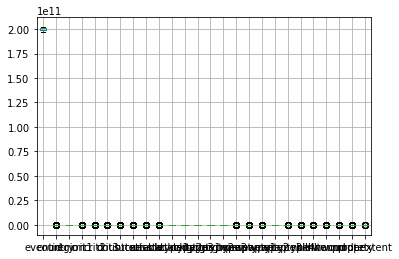

In [18]:
#绘图 boxplot方法,
data1.boxplot()

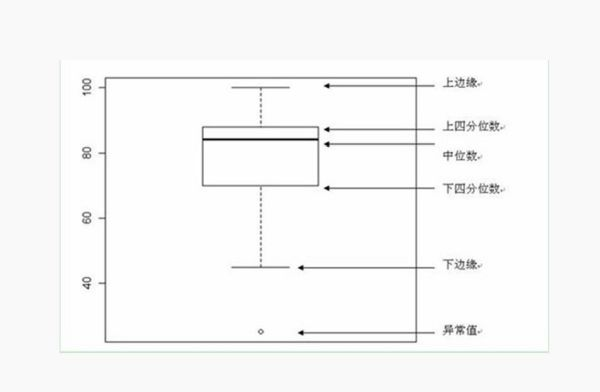

In [19]:
# how to see boxplot
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename ="Boxplot.png", width=500, height=500)
# 规定超过上四分卫-下四分卫的差值（箱子高度）的1.5倍数
# 上四分+ 箱子高度的1.5倍数
# 下四分 -箱子高度的1.5倍数

In [22]:
# 自己写程序找出异常点,前提是需要自己把属性变量化
#[u-3c,u+3c] u位均值，c=sigma=标准差
data2 = data1[:1000]
data2[abs(data2-data2.mean())>3*data2.std()]

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [23]:
# 直接找到异常事件
data2[abs(data2-data2.mean())>3*data2.std()].dropna(how="all")

TypeError: unsupported operand type(s) for -: 'str' and 'float'

# 5.4 数据预处理-数据变换

In [26]:
# 加载boston数据集
from sklearn import datasets
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [30]:
# 对加载的数据进行初步了解
boston.feature_names # 找到列名字
#boston.data.shape # 找到形状
boston.target # 目标属性的值

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [31]:
#转换数据到datafrme
import pandas as pd
df = pd.DataFrame(boston.data[:,4:7])
df.columns = boston.feature_names[4:7]
df

,NOX,RM,AGE
0,0.538,6.575,65.2
1,0.469,6.421,78.9
2,0.469,7.185,61.1
3,0.458,6.998,45.8
4,0.458,7.147,54.2
...,...,...,...
501,0.573,6.593,69.1
502,0.573,6.120,76.7
503,0.573,6.976,91.0
504,0.573,6.794,89.3


#  数据变换
## 规范化
1. 最小最大规范化
    1. 处理之后数据值都落在0-1之间
    2. 缺点
        1. 适合不涉及距离度量的场景
        2. 将来新增的数字可能会越界,需要重新定义
        3. 若某个数很大则规范化后值相近且均接近0
    3. 实现
        1. 自己写
        2. skit-learn
    5. 公式 $x′= \dfrac{x-min}{max-min}$ 
2. z-score规范化
    1. 使用最多
    2. 处理后的数据，均值为0，标准差为1
    3. 实现
        1. 自己写
        2. skit-learn
    4. 公式  $x'=\dfrac{x-\overline x}{\sigma}$ 

3. 小数定标规范化
    1. 移动小数点位置，移动位数取决于属性的绝对值的大小
    2. 常见落在[-1,1]之间
    3. 实现
        1. 自己写
        2. skit-learn * 课程里面没有提及,以后自己 补充*
        
    4. 公式 $x'=\dfrac{x}{10^{j}}$ 
        * 属性那一列绝对值最大值为90
        * 则j设为2位
        * 对那一列每一个数进行 $x'=\dfrac{x}{10^{2}}$
        
## 连续属性离散化
    1. 实现 
        1. pandas cut or qcut
## 特征二值化binarization
    1. 实现
        1. sklearn（课程使用的是sklearn）
        2. pandas（个人认为pandas也可以实现）

# 数据变换-规范化Python实现

In [32]:
# 最小最大规范化-自己写-数据值这样处理之后，全部落在0-1的区间内
(df-df.min())/(df.max()-df.min())

,NOX,RM,AGE
0,0.314815,0.577505,0.641607
1,0.172840,0.547998,0.782698
2,0.172840,0.694386,0.599382
3,0.150206,0.658555,0.441813
4,0.150206,0.687105,0.528321
...,...,...,...
501,0.386831,0.580954,0.681771
502,0.386831,0.490324,0.760041
503,0.386831,0.654340,0.907312
504,0.386831,0.619467,0.889804


In [33]:
# 最小最大规范化- 从skit -learn
from sklearn import preprocessing
min_max_scaler = preprocessing.minmax_scale(df)

array([[0.31481481, 0.57750527, 0.64160659],
       [0.17283951, 0.5479977 , 0.78269825],
       [0.17283951, 0.6943859 , 0.59938208],
       ...,
       [0.38683128, 0.65433991, 0.90731205],
       [0.38683128, 0.61946733, 0.88980433],
       [0.38683128, 0.47307913, 0.80226571]])

In [34]:
# z-score 自己写
(df-df.mean())/df.std()

,NOX,RM,AGE
0,-0.144075,0.413263,-0.119895
1,-0.739530,0.194082,0.366803
2,-0.739530,1.281446,-0.265549
3,-0.834458,1.015298,-0.809088
4,-0.834458,1.227362,-0.510674
...,...,...,...
501,0.157968,0.438881,0.018654
502,0.157968,-0.234316,0.288648
503,0.157968,0.983986,0.796661
504,0.157968,0.724955,0.736268


In [54]:
# z-score skit-lraern 
scaler = preprocessing.scale(df)

NameError: name 'preprocessing' is not defined

In [36]:
# 小数定标规范化 自己写-每一列单独定标
df/10**np.ceil(np.log10(df.abs().max()))

,NOX,RM,AGE
0,0.538,0.6575,0.652
1,0.469,0.6421,0.789
2,0.469,0.7185,0.611
3,0.458,0.6998,0.458
4,0.458,0.7147,0.542
...,...,...,...
501,0.573,0.6593,0.691
502,0.573,0.6120,0.767
503,0.573,0.6976,0.910
504,0.573,0.6794,0.893


In [39]:
help(df.abs)

Help on method abs in module pandas.core.generic:

abs() method of pandas.core.frame.DataFrame instance
    Return a Series/DataFrame with absolute numeric value of each element.
    
    This function only applies to elements that are all numeric.
    
    Returns
    -------
    abs
        Series/DataFrame containing the absolute value of each element.
    
    See Also
    --------
    numpy.absolute : Calculate the absolute value element-wise.
    
    Notes
    -----
    For ``complex`` inputs, ``1.2 + 1j``, the absolute value is
    :math:`\sqrt{ a^2 + b^2 }`.
    
    Examples
    --------
    Absolute numeric values in a Series.
    
    >>> s = pd.Series([-1.10, 2, -3.33, 4])
    >>> s.abs()
    0    1.10
    1    2.00
    2    3.33
    3    4.00
    dtype: float64
    
    Absolute numeric values in a Series with complex numbers.
    
    >>> s = pd.Series([1.2 + 1j])
    >>> s.abs()
    0    1.56205
    dtype: float64
    
    Absolute numeric values in a Series with a Time

# 连续属性离散化
## 方法
1. 分箱（binning）
    * 可以用来平滑噪声，也可以连续属性离散化
    * 只要落到箱子里面，值对应的属性标签都会一致化
    * 箱子的个数或者划分的区间需要相关领域的专家
    * 实现
        1. 等宽法
            1. 把数据区间按设定的箱子数等分
            2. pandas cut
            3. 容易受到异常值的影响，分箱之后有些区域值很多，有的很少
        2. 等频法
            1. 要求落到每个箱子的数量相同
            2. pandas qcut
            3. 等频分析可能会把相同值放到不同的箱子
2. 聚类

In [42]:
# 等宽法
pd.cut(df.AGE,5,labels=range(5))

0      3
1      3
2      2
3      2
4      2
      ..
501    3
502    3
503    4
504    4
505    4
Name: AGE, Length: 506, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [43]:
# 等宽法也可以
bins = [value1,value2,vlue3] # (value1,value2] (value2,value3] 我在GTD项目中的使用

NameError: name 'value1' is not defined

In [44]:
# 等频法
pd.qcut(df.AGE[:20],5,labels=range(5))

0     2
1     3
2     1
3     0
4     1
5     1
6     2
7     4
8     4
9     4
10    4
11    3
12    0
13    2
14    3
15    1
16    0
17    3
18    0
19    2
Name: AGE, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

3. 特征二值化
        1. 设定一个阈值，threshold,之后Binarizer() LabelEncoder()
        2. 大于阈值为1，其余为0
        3. 多分类问题变成二分类问题
        4. 例如：电影评分从0-10，经验告诉我们6分以上会推荐，则6分以上变成推荐
        6分以下变成不推荐

In [48]:
from sklearn.preprocessing import Binarizer
X= boston.target.reshape(-1,1) # boston.target.shape = [1,506]  
                                # now = [506,1]
Binarizer(threshold=20.0).fit_transform(X)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

# 数据预处理-数据规约


## 属性规约：降维度解决数据灾难（属性变少，列变少）
    1. 目的：对属性和数值进行规约获得一个比原数据集的小的多的规约表示，但仍接近原数据的完整性，在规约后数据集上挖掘可产生近乎相同的分析结果
    2. 方法
        1. 向前选择
        每次选择一个最优的属性加入，知道选不到最优属性或者满足一定阈值约束后停止。
        2. 先后删除
        从当前属性集中选择一个最差的删除，直到无法删除或者满足一定阈值后停止。
        3. 决策树
        机器学习的专门算法
        4. **PCA**
            1. 主成分分析，最常用的降维分析法，通过某种线性投影将高纬度数据映射到低维空间表示，并且期望在多投影的维度上数据的方差最大。
            2. 选择较少的成分为主成分，忽略对数据描述不重要的成分，并尽可能多的保留原始数据的特征
## 数值规约：降低事故数量（行变少）
    1. 有参方法--使用模型来评估数据，只需要存放参数，不需要存放实际的数据
        1. 回归法
        2. 对数线性模型
    2. 无参方法--存放实际的数据
        1. **直方图histogram**
            1. 把每一列数据分成多个箱子
            2. 用箱子数量来代替数量吗？
        2. 聚类
        3. **抽样**
            1. 随机抽样
                1. 不放回
                从原始数据集D中N个样本抽取n个样本，每次抽到不同的数据
                2. 放回
                从原始数据集D中N个样本中抽取n个样本，抽取后记录放回，优可能抽取到同样的数据。
            2. 聚类抽样
            3. 分层抽样
                数据集D为划分成互不相交的部分（层），对每一层进行简单随机抽样获得最终结果。

## 属性规约
1. pca
    * 实现 sklearn

In [53]:
from sklearn.decomposition import PCA
x = preprocessing.scale(boston.data)
pca =PCA(n_components=5)
# n_components  = {n:保留特征数，"none":默认值，保留所有特征,"mle":自动选择满足所要求的方差百分比的个数}
pca.fit(x)# 数据来训练该模型


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca.explained_variance_ratio_ # 各个成分各自的百分比，属性（视频中说变量，这很容易和概率论混淆）的方差贡献率，百分比越大，权重越大

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661])

In [55]:
sum([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661])
# result show:前五个成分（属性）解释了数据中80.73%的变化

0.8073178200000001

In [56]:
#让计算机自动选择主成分
pca =PCA(n_components="mle")
# n_components  = {n:保留特征数，"none":默认值，保留所有特征,"mle":自动选择满足所要求的方差百分比的个数}
pca.fit(x)# 数据来训练该模型

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
pca.explained_variance_ratio_ # 各个成分各自的百分比，属性（视频中说变量，这很容易和概率论混淆）的方差贡献率，百分比越大，权重越大

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331])

In [58]:
sum([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331])
#result show :从十三个里面选择了十二个，揭露了99.5%的属性

0.99511467

## 数值规约-- 直方图法
### 表现
* 用分箱表示数据分布
* 每个箱子代表一个属性-频率对

In [60]:
#生成50个数据
data = np.random.randint(1,10,50)

(array([ 3.,  4., 10.,  1.,  0.,  4.,  8.,  3., 10.,  7.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

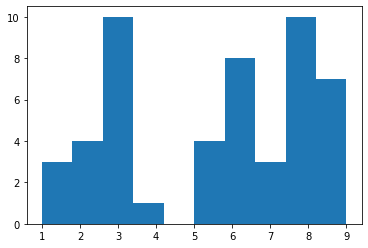

In [62]:
# 画出直方图，让数据集一块一块呈现
import matplotlib.pyplot as plt
plt.hist(data)
#属性和频底对
# 柱子的左侧代表出现的频率

In [63]:
data

array([3, 3, 3, 3, 6, 7, 2, 8, 5, 9, 8, 5, 1, 3, 9, 6, 2, 3, 3, 8, 3, 6,
       8, 6, 8, 3, 6, 5, 8, 9, 5, 3, 7, 8, 8, 6, 1, 8, 6, 9, 8, 2, 2, 9,
       6, 4, 7, 9, 1, 9])

In [64]:
#把数据datq放到两个箱子中
bins= np.linspace(data.min(),data.max(),3,endpoint=True)
bins

array([1., 5., 9.])

In [65]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

(array([18., 32.]), array([1., 5., 9.]), <a list of 2 Patch objects>)

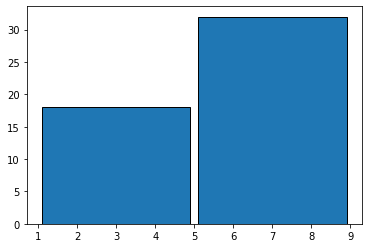

In [66]:
plt.hist(data,bins=bins,rwidth=0.95,edgecolor='k')

(array([17., 13., 20.]),
 array([1.        , 3.66666667, 6.33333333, 9.        ]),
 <a list of 3 Patch objects>)

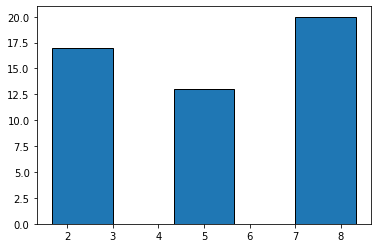

In [68]:
# 课堂作业，放到三个箱子
bins = np.linspace(data.min(),data.max(),4,endpoint=True)
plt.hist(data,bins=bins,rwidth=0.5,edgecolor='k')

## 随机抽样
1. 不放回
    * 不放回随机抽样：从原始数据集D的N个样本中抽取n个样本，每次抽到不同的数据
2. 放回
    * 从原始数据集D的N个样本中抽取n个样本，抽取后记录它后放回，有可能抽到同样的数据

In [69]:
#加载数据
from sklearn import datasets
import pandas as pd
iris =datasets.load_iris()


In [75]:
#转换成dataframe
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
# 不放回抽样
iris_df.sample(n=10)# 抽取数量
iris_df.sample(frac=0.3) # 抽取百分比

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
24,4.8,3.4,1.9,0.2
29,4.7,3.2,1.6,0.2
38,4.4,3.0,1.3,0.2
10,5.4,3.7,1.5,0.2
14,5.8,4.0,1.2,0.2
48,5.3,3.7,1.5,0.2
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8
31,5.4,3.4,1.5,0.4
102,7.1,3.0,5.9,2.1


In [73]:
# 放回抽样
iris_df.sample(n=10,replace=True)# 抽取数量
iris_df.sample(frac=0.3,replace=True) # 抽取百分比

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
129,7.2,3.0,5.8,1.6
62,6.0,2.2,4.0,1.0
89,5.5,2.5,4.0,1.3
121,5.6,2.8,4.9,2.0
76,6.8,2.8,4.8,1.4
144,6.7,3.3,5.7,2.5
93,5.0,2.3,3.3,1.0
143,6.8,3.2,5.9,2.3
140,6.7,3.1,5.6,2.4
75,6.6,3.0,4.4,1.4


## 分层抽样
1. 先分层 之后随机抽样
2. 数据集D为划分成互不相交的部分即层，对每一层进行简单随机抽样获得最终结果
3. 《深入浅出统计学》 将总体分成几个组，这些组具有类似的特性，这些特性或者组被称为层
    * 比如把口香糖球根据颜色分成黄色组、红色组、白色组等，每一种颜色曾为不同的层
    * 之后对每一层按比例随机抽取
    * 还补充了一种系统抽样
    
    

In [78]:
iris_df["target"] = iris.target 
# iris.target其实就是一列，这一列是最终花的类型而已
# iris.data 其实是剩余的四列
#(data,target) 是一个完整的数据集
A = iris_df[iris_df.target==0].sample(frac=0.3) #选出目标属性为0的记录进行抽样

In [80]:
B = iris_df[iris_df.target==1].sample(frac=0.3) #选出目标属性为1的记录进行抽样
A.append(B) # 对数据进行连接

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
24,4.8,3.4,1.9,0.2,0
27,5.2,3.5,1.5,0.2,0
22,4.6,3.6,1.0,0.2,0
20,5.4,3.4,1.7,0.2,0
35,5.0,3.2,1.2,0.2,0
15,5.7,4.4,1.5,0.4,0
40,5.0,3.5,1.3,0.3,0
16,5.4,3.9,1.3,0.4,0
29,4.7,3.2,1.6,0.2,0
4,5.0,3.6,1.4,0.2,0


# Python数据统计挖掘与应用
## 6.1 数据探索
## 6.2  基于pandas的数据统计与分析
## 6.3 聚类分析
## 6.4 理工类的应用
## 6.5 人文社科类应用
## 拓展 男女评分电影差异
## 基于随机森林的红葡萄酒数据分类分析

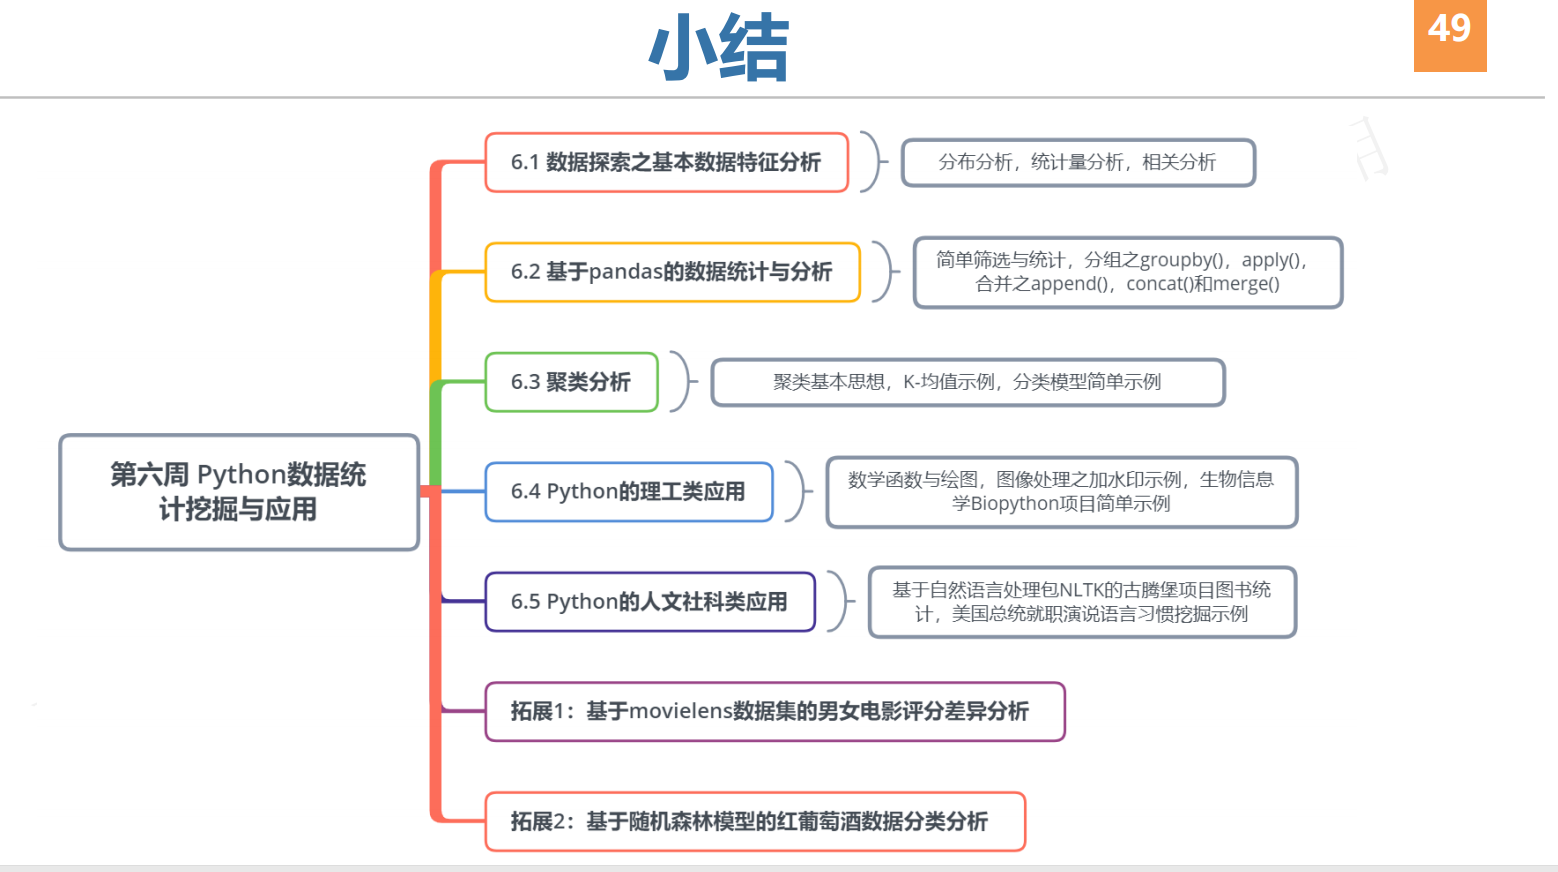

In [55]:
# 本章总结
from PIL import Image
im1 = Image.open("chapter6 conclus.png")
im1

# 6.1 数据探索
数据探索是数据真正进入统计分析和挖掘前的步骤，往往是拿到数据之后的第一步

与数据预处理有一些交集

数据探索有助于正确的理解数据，帮助做出明智的决策

主要任务：
1. 检查数据错误（脏数据）
    1. 缺失值（已经介绍）
    2. 异常值 （已经介绍）
    3. 不一致的数据
        1. 不一致的数据大多在数据集成的环节，两张表中某些属性值的表示不同 
            1  类型不一致
                1. 一个value是int ，一个是float astype()转换
                2. 一个是2019-10-01  or  1569936600
2. 了解数据分布特征和内在规律
    1. 利用pandas的统计和matplotlib的绘图实现基本数据特征分析
        1. 分布分析
            1. 定量数据分布分析
                了解数据分布是否对称
                常通过描述属性-频率对的直方图来观察
            2. 定性数据分布分析
                关注分类的分布，常常用饼图表示或者value_counts()
        2. 统计量分析
            1. 集中趋势分析 central tendency analysis
                讨论数据平均或集中所处的位置
                均值、中位数、众数
                均值：很好反应平均值，但是有特别大或者小的值或者数据是偏态的，均值不能很好的反应集中趋势
                中位数：从小到大排序，选择中间 {101：51，100，50+51 /2}
            2. 离中趋势分析 dispersion tendency analysis
                1. 离中心的程度
                2. 标准差、四分卫距
                3. 标准差：体现数据与均值的离散程度，{小：相对接近平均值，大：不太接近平均值}
                4. 四分位距：原始数据的一般，值越大，说明变异程度越大。
             
        3. 相关分析
            1. 分析连续变量之间的线性强度
                1. 单个散点图：最直观表示数据相关性的形式
                    1. 误差平方和，垂直于x轴，表示这**两个变量**正线性相关
                    2. 负线性相关
                2. 散点图矩阵、条形图矩阵：观察各个变量之间的相关关系
                    1. 后面谈
                3. 相关系数：两个或者多个变量的相关关系更加精确
                    1. Pearson相关系数
                        1. 约束条件
                            1. 连个变量间有线性关系
                            2. 均是连续变量
                            3. 变量均符合正态分布，且二元分布也具有正态分布
                            4. 两个变量独立
                        2. r的结果
                            1. 正相关:r>0
                            2. 负相关：r<0
                            3. 不相关：r = 0
                            4. 完全线性相关：|r| = 1
                            5. 0-1之间，一般认为 {r>0.5:相关性比较显著，r>0.8:高度相关,r<=0.3：基本不相关,0.3<r<0.5:相关度较低}
                            6. 如果过低，只能说明不存在线性相关关系，可能存在非线性相关关系
                    2. Spearman相关系数
                        1. 约束条件
                    3. Kenddall肯德尔相关系数
                    4. 可用heatmap来画图
                4. 判定系数r平方，简称r方
                    1. 是相关系数的平方
                    2. 衡量回归方程对属性的解释程度
                    3. 越接近1表示属性相关性越强，越接近0越弱
                    4. 后面补充

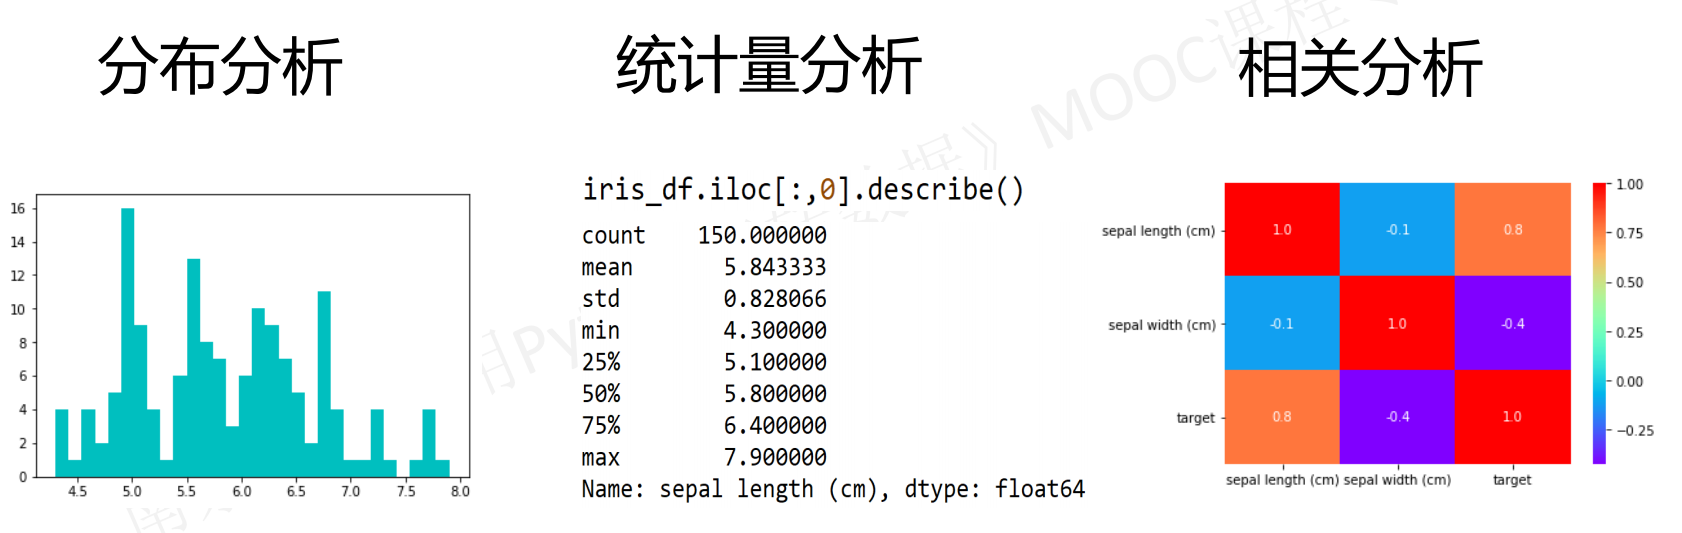

In [56]:
#了解数据分布特征和内在规律
from PIL import Image
image =Image.open("Basic distribution characteristics and internal laws.png")
image

In [81]:
# load dataset
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df["target"] = iris.target

In [82]:
iris_df.target
# result show: target{"type":int ，counts:150}

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [84]:
# 转换成float  astype()
iris_df.target = iris_df.target.astype(float)
iris_df
# result show: target{type:float}

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 分布分析-Python实现
1. 定量
    * 直方图
    * 正态分布   *卡方分布统计，关联的p值{x>0.05,满足正态分布}
2. 定性
    * .value_counts()
    * pie图  .value_counts().plot(kind = 'pie') 


In [85]:
# 观察下数据情况
iris_df.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

(array([ 4.,  1.,  4.,  2.,  5., 16.,  9.,  4.,  1.,  6., 13.,  8.,  7.,
         3.,  6., 10.,  9.,  7.,  5.,  2., 11.,  4.,  1.,  1.,  4.,  1.,
         0.,  1.,  4.,  1.]),
 array([4.3 , 4.42, 4.54, 4.66, 4.78, 4.9 , 5.02, 5.14, 5.26, 5.38, 5.5 ,
        5.62, 5.74, 5.86, 5.98, 6.1 , 6.22, 6.34, 6.46, 6.58, 6.7 , 6.82,
        6.94, 7.06, 7.18, 7.3 , 7.42, 7.54, 7.66, 7.78, 7.9 ]),
 <a list of 30 Patch objects>)

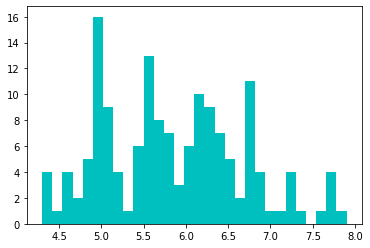

In [88]:
# 定量1-使用hist模块绘制直方图-花瓣长度
import matplotlib.pyplot as plt
plt.hist(iris_df.iloc[:,0],30,color='c')

In [89]:
# 定量2-检验是够符合正态分布
import scipy
scipy.stats.normaltest(iris_df.iloc[:,0],axis=0)# axis=0 ，默认在每一列上做正态检验
# result show :卡方分布统计，关联的p值{x>0.05,满足正态分布}

NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)

(array([ 1.,  0.,  3.,  4.,  0.,  3.,  8.,  5.,  9., 14.,  0., 10., 26.,
        11.,  0., 13.,  6., 12.,  6.,  4.,  0.,  3.,  6.,  2.,  0.,  1.,
         1.,  1.,  0.,  1.]),
 array([2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56, 2.64, 2.72, 2.8 ,
        2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44, 3.52, 3.6 , 3.68,
        3.76, 3.84, 3.92, 4.  , 4.08, 4.16, 4.24, 4.32, 4.4 ]),
 <a list of 30 Patch objects>)

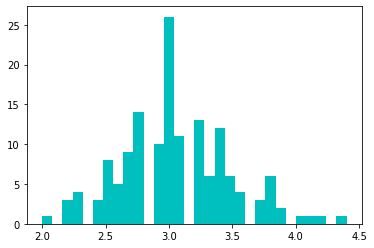

In [90]:
# 使用hist模块绘制直方图
import matplotlib.pyplot as plt
plt.hist(iris_df.iloc[:,1],30,color='c')

In [93]:
# 检验是够符合正态分布
import scipy
scipy.stats.normaltest(iris_df.iloc[:,1],axis=0)# axis=0 ，默认在每一列上做正态检验
# result show :卡方分布统计，关联的p值{x>0.05,满足正态分布}

NormaltestResult(statistic=3.1238322481520377, pvalue=0.2097338099298262)

(array([ 2.,  9., 26., 11.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,
         2.,  4.,  8.,  6., 12.,  8.,  9., 12.,  4.,  5.,  9.,  5.,  5.,
         1.,  1.,  3.,  1.]),
 array([1.        , 1.19666667, 1.39333333, 1.59      , 1.78666667,
        1.98333333, 2.18      , 2.37666667, 2.57333333, 2.77      ,
        2.96666667, 3.16333333, 3.36      , 3.55666667, 3.75333333,
        3.95      , 4.14666667, 4.34333333, 4.54      , 4.73666667,
        4.93333333, 5.13      , 5.32666667, 5.52333333, 5.72      ,
        5.91666667, 6.11333333, 6.31      , 6.50666667, 6.70333333,
        6.9       ]),
 <a list of 30 Patch objects>)

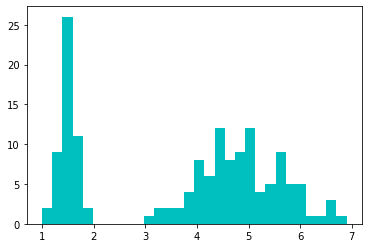

In [92]:
# 使用hist模块绘制直方图
import matplotlib.pyplot as plt
plt.hist(iris_df.iloc[:,2],30,color='c')

In [94]:
# 检验是够符合正态分布
import scipy
scipy.stats.normaltest(iris_df.iloc[:,2],axis=0)# axis=0 ，默认在每一列上做正态检验
# result show :卡方分布统计，关联的p值{x>0.05,满足正态分布}

NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)

(array([ 5., 29.,  7.,  7.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  7.,  3.,
         5.,  0., 13.,  8., 12.,  4.,  2.,  0., 12.,  5.,  6.,  0.,  6.,
         3.,  8.,  3.,  3.]),
 array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 ,
        0.98, 1.06, 1.14, 1.22, 1.3 , 1.38, 1.46, 1.54, 1.62, 1.7 , 1.78,
        1.86, 1.94, 2.02, 2.1 , 2.18, 2.26, 2.34, 2.42, 2.5 ]),
 <a list of 30 Patch objects>)

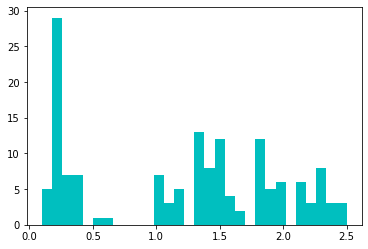

In [95]:
# 使用hist模块绘制直方图
import matplotlib.pyplot as plt
plt.hist(iris_df.iloc[:,3],30,color='c')

In [96]:
# 检验是够符合正态分布
import scipy
scipy.stats.normaltest(iris_df.iloc[:,3],axis=0)# axis=0 ，默认在每一列上做正态检验
# result show :卡方分布统计，关联的p值{x>0.05,满足正态分布}

NormaltestResult(statistic=137.55596543193647, pvalue=1.3492785927137586e-30)

## 定性分析-前提已经定性分好类了
1. value_counts()
2. pie图

In [97]:
iris_df.target.value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

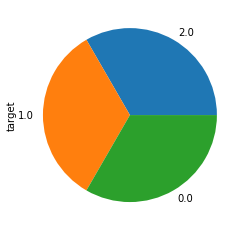

In [99]:
# 饼图更加直观
iris_df.target.value_counts().plot(kind="pie")

# 统计量的分析
## 集中趋势分析Central tendency analysis
1. 均值mean(), 中位数median()
## 离中趋势分析Dispersion tendency analysis
1. 标准差std()，四分位距quantile()

In [101]:
#均值
iris_df.iloc[:,0].mean()
# 中位数
iris_df.iloc[:,0].median()

5.8

In [104]:
# 标准差
iris_df.iloc[:,0].std()
#分位数-中分位
iris_df.iloc[:,0].quantile()
# 具体分位数
iris_df.iloc[:,0].quantile([0.25,0.5,0.75])

0.25    5.1
0.50    5.8
0.75    6.4
Name: sepal length (cm), dtype: float64

In [105]:
# 求四分卫距 = 一个箱子的宽度= 上四分卫-下四分卫
# serieds相见
iris_df.iloc[:,0].quantile([0.75]).loc[0.75]- iris_df.iloc[:,0].quantile([0.25]).loc[0.25]

1.3000000000000007

In [106]:
# describe一次性完成,一个series对象
iris_df.iloc[:,0].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

# 相关性分析
## 散点图

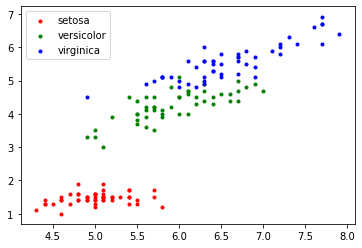

In [109]:
# 观看iris第二个属性和第一个属性的相关分析
X = [item[0] for item in iris.data]
Y = [item[2] for item in iris.data]

plt.scatter(X[:50],Y[:50],color="red",marker=".",label="setosa")
plt.scatter(X[50:100],Y[50:100],color="green",marker='.',label='versicolor')
plt.scatter(X[100:],Y[100:],color="blue",marker='.',label='virginica')

plt.legend(loc="best")
plt.show()

In [110]:
# 相关系数-多变量-Pearson线性相关系数
iris_df.iloc[:,[0,1,4]].corr() #默认person

,sepal length (cm),sepal width (cm),target
sepal length (cm),1.000000,-0.117570,0.782561
sepal width (cm),-0.117570,1.000000,-0.426658
target,0.782561,-0.426658,1.000000


In [111]:
#相关系数-两个变量-Pearson线性相关系数
iris_df["target"].corr(iris_df.iloc[:,-0]) #默认person

0.7825612318100819

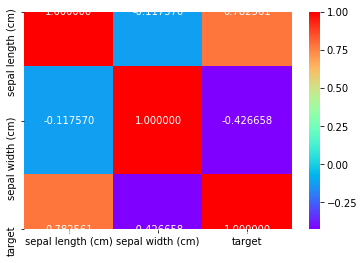

In [112]:
# 用heatmap来展示-相关系数—Pearson线性相关系数
import seaborn as sns
sns.heatmap(iris_df.iloc[:,[0,1,4]].corr(),annot=True,fmt='1f',cmap="rainbow")
# 颜色越深，代表相关度越高

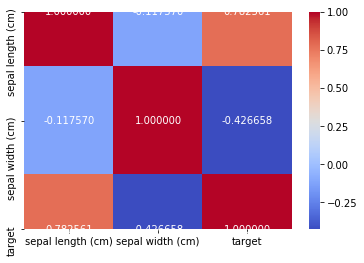

In [113]:
# 用heatmap来展示
import seaborn as sns
sns.heatmap(iris_df.iloc[:,[0,1,4]].corr(),annot=True,fmt='1f',cmap="coolwarm")
# 颜色越深，代表相关度越高

In [114]:
# 课程里面heatmap出现了一些问题：部分数字溢出，过段时间解决

In [116]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 20200401 基于pandas的数据统计与分析
## series
## dataframe

In [145]:
# 载入数据
data = pd.read_csv("GTD_tags.csv")
data.head()

/root/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,country,country_txt,region,region_txt,city,summary,crit1,crit2,crit3,...,weaptype3_txt,weaptype4,weaptype4_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt
0,197000000001,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,1,1,1,...,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN
1,197000000002,130,Mexico,1,North America,Mexico city,NaN,1,1,1,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
2,197001000001,160,Philippines,5,Southeast Asia,Unknown,NaN,1,1,1,...,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN
3,197001000002,78,Greece,8,Western Europe,Athens,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,197001000003,101,Japan,4,East Asia,Fukouka,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [117]:
# 看一下DataFrame的属性
import pandas as pd
dir(pd.DataFrame)# dir 返回对象的属性列表

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

In [123]:
# 载入股票的信息，这里用已经处理之后的GTD信息替代
# 问题以一：求成交价的均值
data.nkill.mean()
# 问题二：成分股中最近一次成交价大于等于300的公司名称
data[data["nkill"]>10]
# 问题三： 成交价大于等于300或小于等于50的公司
data[(data["nkill"]>100)|(data["nkill"]<=2)]
# 问题四：运通公司2019年度9月份的股票开盘天数
## 这里的index表示行索引
data[(data.index>="2019-09-01")&(data.index<="2019-09-30")]

,eventid,country,country_txt,region,region_txt,city,summary,crit1,crit2,crit3,...,weaptype3_txt,weaptype4,weaptype4_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt
0,197000000001,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,1,1,1,...,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN
1,197000000002,130,Mexico,1,North America,Mexico city,NaN,1,1,1,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
2,197001000001,160,Philippines,5,Southeast Asia,Unknown,NaN,1,1,1,...,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN
5,197001010002,217,United States,1,North America,Cairo,1/1/1970: Unknown African American assailants ...,1,1,1,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million)
6,197001020001,218,Uruguay,3,South America,Montevideo,NaN,1,1,1,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191456,201812310027,113,Libya,10,Middle East & North Africa,Unknown,12/31/2018: Assailants attacked a support faci...,1,1,1,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million)
191458,201812310029,4,Afghanistan,6,South Asia,Farah,12/31/2018: Assailants shot and killed a Natio...,1,1,1,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,NaN,NaN
191461,201812310032,4,Afghanistan,6,South Asia,Dik Sar,12/31/2018: Assailants attacked and killed a c...,1,1,1,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,NaN,NaN
191462,201812310033,4,Afghanistan,6,South Asia,Nad Ali district,12/31/2018: Assailants attacked a police outpo...,1,1,1,...,NaN,NaN,NaN,1.0,0.0,3.0,0.0,0,NaN,NaN


In [124]:
#统计美国运通公司近一年股票涨价和跌价的天数
## 分析：一天内的收盘价格和开始价格
len(data[data.nkill >data.nwound

50457

## 对python要有自信，基本上你能想到的，Python都能实现
## 多去看官方文档

In [126]:
#统计美国运通公司近一年相邻两天的收盘价涨跌情况
## 分析：后一天的收盘价和前一天的收盘价进行对比
status = np.sign(np.diff(data.nkill)) # diff用于前后对比，之后sign表示符
status
# 注意这里的输入数据要排除空数据
#{"-1":跌，"1":涨}

array([-1.,  1., nan, ..., nan,  0., -1.])

In [127]:
# 涨价的天数
len(status[status==1])

50527

In [129]:
# 按照最近的一次成交价格，对道指成分股票进行排序。根据结果列出前三甲公司名称
data.sort_values(by="nkill",ascending=False)#通过nkill排序，逆序排列
data[:3].nwound # 切片去除前三甲信息

0    0.0
1    0.0
2    0.0
Name: nwound, dtype: float64

In [141]:
# 分组groupby，把原数据分成几组，之后对每组讨论
# 统计近一年美国运通公司每个月的股票开盘天数
## 分析：从date中获取列2018-03-03，之后计算开盘天数
month = [item[1:2] for item in data.region_txt] # 原视频用的data.index，因为正好是日期
data.groupby(month) #按照month 分组,这个month里面不用去重，直接可以使用
data.groupby(month).region_txt.count() #month 每一个组的open列，进行count运算
# Compute count of group, excluding missing values.，计算每一组的次数

a     6025
e    27773
i    53110
o    84500
u    20056
Name: region_txt, dtype: int64

In [146]:
# 分别提取组名和组内容,看分组时候的数据形态
for k,data1 in data.groupby(month):
    print(k)

a
e
i
o
u


In [147]:
print(data1)

             eventid  country               country_txt  region  \
16      197001110001       65                  Ethiopia      11   
132     197003140001       65                  Ethiopia      11   
165     197004000001       65                  Ethiopia      11   
565     197010210001       14                 Australia      12   
668     197101150001      230                    Zambia      11   
...              ...      ...                       ...     ...   
191434  201812300020      147                   Nigeria      11   
191435  201812300021      123                      Mali      11   
191449  201812310018      123                      Mali      11   
191451  201812310020       37                  Cameroon      11   
191457  201812310028       41  Central African Republic      11   

                   region_txt         city  \
16         Sub-Saharan Africa      Unknown   
132        Sub-Saharan Africa      Unknown   
165        Sub-Saharan Africa      Unknown   
565     Aus

# 20200403  基于pandas的数据统计
## 分组之后的目的（groupby）
1. 拆分 splitting
2. 应用 applying，应用某一个函数
3. 合并 combining，将最后的结果聚合在一起

In [162]:
# 统计一个月股票的开盘天数
## df.apply(functionname,axis=0)
### 自动遍历每一列数据
month = [item[1:2] for item in data.region_txt] # 原视频用的data.index，因为正好是日期
month = data.groupby(month).apply(len) # 先按照月份分组，之后
month
#data.groupby(month).apply(len,axis=0) #按照month 分组

a     6025
e    27773
i    53110
o    84500
u    20056
dtype: int64

In [173]:
# 每一列的最大值，每一行直接axis=1
data.max() # 直接调用每一列的最大值
#data.apply(max) # max可用于series对象

# 转换类型
data.loc[:,["nkill"]].astype(int)

import numpy as np
data.loc[:,["nkill"]].apply(np.int) # 这里非常特殊，int不能用于series对象

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [174]:
#applymap作用在每一个上面,这个可以直接使用int
data.loc[:,["nkill"]].applymap(int) 

ValueError: ('cannot convert float NaN to integer', 'occurred at index nkill')

## pandas中的merge
1. append-添加行到DataFrame
2. concat-连接到Pandas对象
3. join-SQL类型的连接

In [175]:
# 把美国运通公司2019年9月1日到9月5日间的股票交易信息追加到2019年2月最后两天
q = data[2:3][-2:]# data[:]表示取行操作
p = data[7:8]
p.append(q)


,eventid,country,country_txt,region,region_txt,city,summary,crit1,crit2,crit3,...,weaptype3_txt,weaptype4,weaptype4_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt
7,197001020002,217,United States,1,North America,Oakland,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million)
2,197001000001,160,Philippines,5,Southeast Asia,Unknown,NaN,1,1,1,...,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN


In [176]:
# 将运通公司2019年股票中前三个和后三个合并
# ignore_index = True 很厉害
q = data[(data.index<2)|(data.index>10)]
price = [q[:3],q[-3:]]
pd.concat(price)

,eventid,country,country_txt,region,region_txt,city,summary,crit1,crit2,crit3,...,weaptype3_txt,weaptype4,weaptype4_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt
0,197000000001,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,1,1,1,...,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN
1,197000000002,130,Mexico,1,North America,Mexico city,NaN,1,1,1,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
11,197001060001,217,United States,1,North America,Denver,1/6/1970: Unknown perpetrators threw a Molotov...,1,1,1,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million)
191461,201812310032,4,Afghanistan,6,South Asia,Dik Sar,12/31/2018: Assailants attacked and killed a c...,1,1,1,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,NaN,NaN
191462,201812310033,4,Afghanistan,6,South Asia,Nad Ali district,12/31/2018: Assailants attacked a police outpo...,1,1,1,...,NaN,NaN,NaN,1.0,0.0,3.0,0.0,0,NaN,NaN
191463,201812310034,603,United Kingdom,8,Western Europe,Belfast,12/31/2018: Assailants armed with sledgehammer...,0,1,1,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million)


In [178]:
# join数据库的概念
## 这个后面补充
## 把美国运通公司和可口可乐公司近一年中每个月的成交量均值（包含股票代码）与道琼斯股票合并
pd.merge(data.drop(["nkill"],axis=1),data1,on="")

KeyError: ''

# 6.3 聚类分析
聚类是数据挖掘描述性任务和预测性任务的一个重要的组成部分，它以相似性为基础，把相似的对象通过静态分类分成不同的组别和子集

聚类算法有很多，k均值因为简单快捷，使用广泛，简单但是够用

In [186]:
#高数    高数    英语    Python    音乐
#小明    88      64       96       85
#大明    92      99       95       94
#
import numpy as np
from scipy.cluster.vq import vq,kmeans,whiten
list1 = [88.0,74.0,96.0,85.0]
list2 = [92.0,99.0, 95.0, 94.0]
list3 = [91.0, 87.0, 99.0,95.0]
list4 = [88.0, 78.0, 98.0, 84.0]
list5 = [88.0, 78.0, 98.0, 84.0]
list6 = [100.0, 95.0, 100.0, 92.0]

data = np.array([list1,list2,list3,list4,list5,list6])

whiten = whiten(data)# 算出各列元素的标准差，形成新的数组

centroids,_ = kmeans(whiten,2)# 随数据进行聚类，(数据，分成几类)
# 返回一个元组，只需要用到第一个值，聚类中心数组
result,_ =vq(whiten,centroids)# 矢量量化函数,对每一个人进行归类
print(result)
# result : 1为一类，0为一类

[0 1 1 0 0 1]


In [188]:
#skit-learn
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

list1 = [88.0,74.0,96.0,85.0]
list2 = [92.0,99.0, 95.0, 94.0]
list3 = [91.0, 87.0, 99.0,95.0]
list4 = [88.0, 78.0, 98.0, 84.0]
list5 = [88.0, 78.0, 98.0, 84.0]
list6 = [100.0, 95.0, 100.0, 92.0]

X = np.array([list1,list2,list3,list4,list5,list6])
kmeans = KMeans(n_clusters = 2).fit(X) # fit是一个学习过程

pred = kmeans.predict(X)
print(pred)

[0 1 1 0 0 1]


# 分类问题
把数据集分为两类，一类为训练集，一类为测试集

从训练集中获得一个模型

对测试机中未知对象的类做一个确定的标记


假设有一年上班的数据，最终判定是否上班，影响因素有天气，吃饱饭等

先从训练集找到模型，之后来测试未来是否上班


In [192]:
# SVM支持向量机算法,这里代码有问题
from sklearn import datasets
from sklearn import svm

clf = svm.SVC(gamma = 0.001,C=100.)
digits = datasets.load_digits()

clf.fit(digits.data[:-1],digits.target[:-1])

result = clf.predict(digits.data[-1].reshape(1,-1))
# 这里的reshape是skit-learn第二版的改变
print(result)

[8]


In [193]:
# 重新回到聚类问题，股票的问题
# 分成三类，是不是和政治，经济有关系呢

# 模型选择与评估
对于复杂的任务用机器学习来完成的话，基于数据和任务选择合适的模型

比方说是分类模型还是聚类模型

模型确定之后有一个重要的步骤，就是要确定模型参数，参数的确定往往不能纯粹的依靠经验

假设一堆数据，用K-means聚类，那么cluster的最佳个数确定，需要调节参数，称之为调参。

调参是一个很重要同时会发挥很多精力的事情，不断调整参数，**评估模型**，期望获得一个比较好的模型，让真实值和预测值之间的误差尽量小

k-means（），SSE，Elbow method，肘部位置为最佳的cluster值。K-means的原理和最佳k值的选择参考课程文档。

# 6.4 Python的理工应用

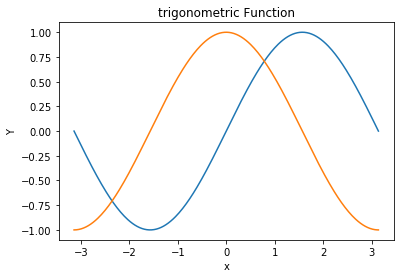

In [194]:
# 简单的三角函数计算
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi,256)
s = np.sin(x)
c = np.cos(x)

plt.title("trigonometric Function")

plt.xlabel("x")
plt.ylabel('Y')
plt.plot(x,s)
plt.plot(x,c)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  """
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  
/root/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


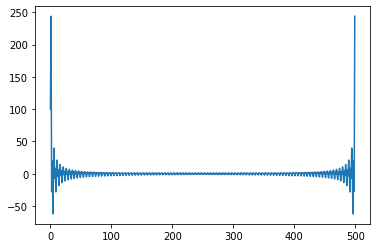

In [195]:
# 一组数据的快速傅里叶变换
import scipy as sp
import matplotlib.pyplot as plt

listA = sp.ones(500)

listA[100:300] = -1
f = sp.fft(listA)

plt.plot(f)

(600, 392) JPEG RGB


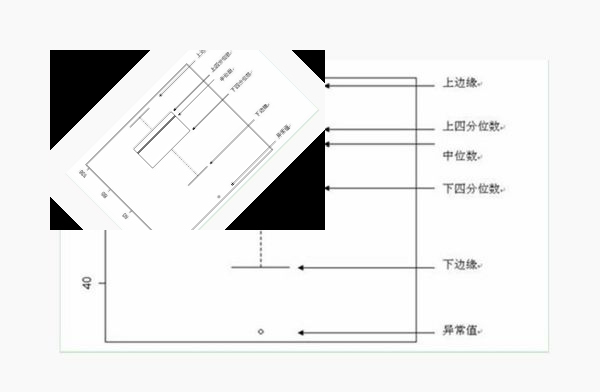

In [200]:
# 图像处理库
## pillow(PIL)
##OpenCV
### 包含大量变成接口
##Skimage
###
# 生物学 biopython

from PIL import Image

im1 = Image.open("Boxplot.png")
print(im1.size, im1.format, im1.mode)
Image.open("Boxplot.png").save("2.png")# 存成2.png

im2 = Image.open("2.png")
size = (288,180)
im2.thumbnail(size)# 缩略图
out = im2.rotate(45)#缩略图旋转，背景不旋转
im1.paste(out,(50,50)) #放到第一张图
im1

# 6.5人文社科领域

In [215]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [222]:
# 做一些简单的处理
allwords = gutenberg.words("shakespeare-hamlet.txt")
len(allwords)
len(set(allwords)) # 去重
allwords.count("Hamlet")

99

In [224]:
# 选出大于九的单词进行排序
a = set(allwords)
word = [i  for i in a if len(i) > 9]
print(sorted(word))

['Abridgements', 'Aduancement', 'Affliction', 'Allegeance', 'Ambassador', 'Ambassadors', 'Ambassadours', 'Apparition', 'Associates', 'Attendants', 'Auspicious', 'Authorities', 'Battalians', 'Battlements', 'Carbuncles', 'Cataplasme', 'Celestiall', 'Challenger', 'Christians', 'Chronicles', 'Churchyards', 'Circumstance', 'Circumstances', 'Colaterall', 'Colleagued', 'Collection', 'Columbines', 'Combination', 'Commandment', 'Commencement', 'Commission', 'Companions', 'Complexion', 'Compounded', 'Compulsatiue', 'Conception', 'Conclusions', 'Condolement', 'Confederate', 'Conference', 'Confession', 'Coniuration', 'Conscience', 'Contagious', 'Contraction', 'Controuersie', 'Conuersation', 'Conueyances', 'Coronation', 'Corruption', 'Counsellor', 'Countenance', 'Deliberate', 'Discomfort', 'Discretion', 'Distilment', 'Enterprize', 'Euerlasting', 'Exceedingly', 'Faulconers', 'Fellowship', 'Fishmonger', 'Fortinbras', 'Gentlewoman', 'Groundlings', 'Guildenstern', 'Guildensterne', 'Historicall', 'Honou

30266
4699
 the  and   to   of    i  you    a   my   it   in that  ham   is  not  his this with your  but  for 
 993  863  685  610  574  527  511  502  419  400  377  337  328  300  285  276  254  253  249  245 


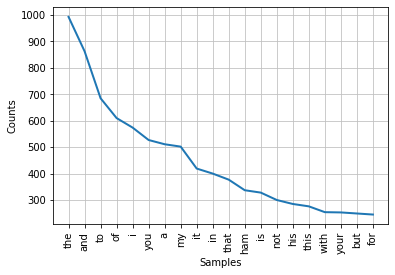

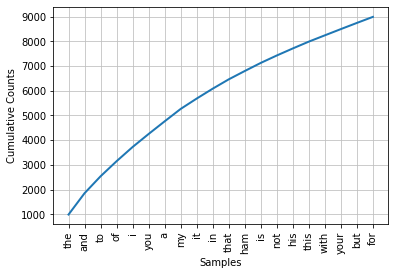

In [226]:
# 统计前20个单词，不区分大小写
from nltk.corpus import gutenberg
from nltk.probability import *

fd2 = FreqDist([sx.lower() for sx in allwords if sx.isalpha()]) # 所有单词转小写
print(fd2.N())# 所有单词的个数
print(fd2.B())# 不同单词的个数
fd2.tabulate(20) #把前20组数据以表格的方式显示出来
fd2.plot(20)
fd2.plot(20,cumulative=True)# cumulative随数据进行累计

In [242]:
#就职演说语料库,美国总统freddom的出现频率
from nltk.corpus import inaugural
fd3 = FreqDist([s for s in inaugural.words()])
print(fd3.freq("freedom"))

0.0012016262007917382


dict_items([('1981-Reagan.txt', FreqDist({2: 538, 3: 525, 1: 420, 4: 390, 5: 235, 7: 192, 6: 176, 8: 109, 9: 93, 10: 66, ...})), ('1985-Reagan.txt', FreqDist({3: 570, 2: 510, 1: 430, 4: 407, 5: 294, 7: 206, 6: 204, 8: 138, 9: 71, 10: 61, ...})), ('1989-Bush.txt', FreqDist({3: 556, 1: 486, 2: 437, 4: 435, 5: 253, 6: 184, 7: 147, 8: 72, 9: 60, 10: 51, ...})), ('1993-Clinton.txt', FreqDist({3: 380, 2: 307, 1: 277, 4: 274, 5: 152, 6: 137, 7: 107, 8: 86, 9: 67, 10: 39, ...})), ('1997-Clinton.txt', FreqDist({3: 534, 2: 378, 4: 352, 1: 350, 5: 225, 6: 179, 7: 171, 8: 117, 9: 70, 10: 45, ...})), ('2001-Bush.txt', FreqDist({3: 334, 2: 317, 1: 294, 4: 234, 5: 163, 7: 152, 6: 134, 8: 70, 9: 64, 10: 32, ...})), ('2005-Bush.txt', FreqDist({3: 469, 2: 395, 4: 332, 1: 320, 7: 234, 5: 203, 6: 162, 9: 90, 8: 79, 10: 49, ...})), ('2009-Obama.txt', FreqDist({3: 599, 2: 441, 4: 422, 1: 350, 5: 236, 6: 225, 7: 198, 8: 96, 9: 63, 10: 59, ...}))])


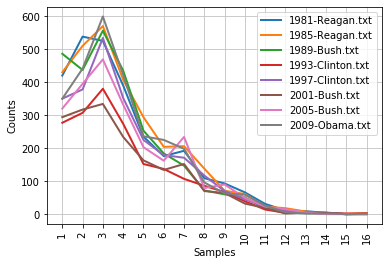

In [245]:
from nltk.corpus import inaugural
cfd = ConditionalFreqDist(
    (fileid,len(w))  # 基于单词的长度
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    if fileid>"1980" and fileid<"2010")
print(cfd.items())
cfd.plot()
# result shows : 2009年奥巴马的就职演讲，长度为三的单词最多

In [246]:
# 对于统计来所，the类单词没有意义
##产生停用词的概念stopwords
## nltk有专门停用词库
#需要自己探索

# 基于pandas的男女电影评分差异分析

In [248]:
#laod data
import numpy as np
import pandas as pd

unames = ["user id","age","gender","occupation","zip code"]
users = pd.read_csv("ml-100k/u.user",sep="|",names= unames)
rnames = ["user id","item id","rating","timestamp"]
ratings = pd.read_csv("ml-100k/u.data",sep="\t",names=rnames)

In [249]:
#
user_df = users.loc[:,["user id","gender"]]
ratings_df = ratings.loc[:,["user id","rating"]]
ratings_df = pd.merge(user_df,ratings_df)

In [250]:
ratings_df

,user id,gender,rating
0,1,M,4
1,1,M,3
2,1,M,4
3,1,M,4
4,1,M,4
...,...,...,...
99995,943,M,1
99996,943,M,4
99997,943,M,3
99998,943,M,4


In [251]:
# 计算评分标准差
## 先按照性别分组
## 之后计算标准差
ratings_df.groupby("gender").rating.std()

gender
F    1.170951
M    1.109556
Name: rating, dtype: float64

In [252]:
#apply
#pandas中的std，计算标准差分母为n-1,符合自然的无偏估计
#numpy中的std，是有偏估计
ratings_df.groupby("gender").rating.apply(pd.Series.std)

gender
F    1.170951
M    1.109556
Name: rating, dtype: float64

In [256]:
#统计每一个用户的打分均值,因为每一个用户给多个电影打分了
df1 = ratings_df.groupby(["user id","gender"]).apply(np.mean)

In [257]:
df1.groupby("gender").rating.std()
#result shows: 女性标准差大于男性

gender
F    0.481241
M    0.430076
Name: rating, dtype: float64

In [258]:
# 透视表,来解决男女评分差异
pd.pivot_table(df1,values="rating",index="gender",aggfunc= pd.Series.std)
#{df1：透视数据，index：最后需要的内容，aggfunc:}

,rating
gender,
F,0.481241
M,0.430076


In [260]:
# 透视表,来解决男女评分差异
t = pd.pivot_table(ratings_df,values="rating",index=["user id","gender"])
#{df1：透视数据，index：最后需要的内容，aggfunc:默认均值}
female = t.query("gender==['F']")#要获得结果当中女性的数据
pd.Series.std(female)

rating    0.481241
dtype: float64

# 总结
## 项目有助于提高
## 观察数据集的形式和内容很重要

# 6.2 基于随机森林的红酒品质分析

In [264]:
#load data 
## url = http://archive.ics.uci.edu/ml/datasets/Wine+Quality  这个网站很强,下载数据
## 读取下载的数据，观看基本特点，这里的基本特点是表格变成dataframe的基本特点
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

try:
    wine = pd.read_csv("winequality-red.csv",sep=";")
except:
    print("cannot find the file")

# understand data
## 上面的url有属性的介绍
### 11个输入变量，1个输出变量品质的好坏



In [265]:
#看表格基本信息
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [267]:
# 重复对象
wine.duplicated().sum() 
#删除重复对象
wine = wine.drop_duplicates()

In [268]:
# 数据的基本统计信息
wine.describe()
# result shows:quality中位数和上四分卫数都是6，表明6评分至少占据四分之一

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [270]:
#观看输出变量quality的具体分布
wine.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

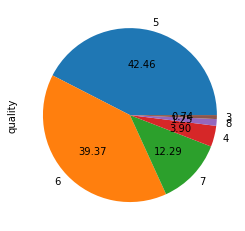

In [271]:
#用pie图看
wine.quality.value_counts().plot(kind="pie",autopct="%.2f")

In [272]:
#正态分布的测试，这里不测试

In [273]:
#测试其他属性和quality的相关性
wine.corr().quality

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

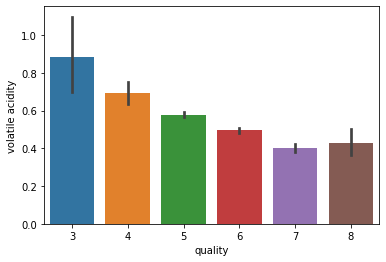

In [275]:
sns.barplot(x="quality",y="volatile acidity",data=wine)
#how to observe this picture

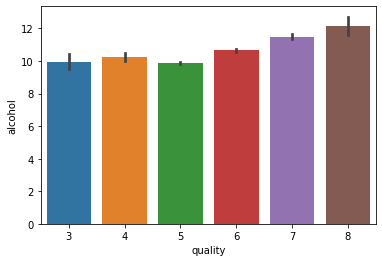

In [276]:
sns.barplot(x="quality",y="alcohol",data=wine)
#how to see
# quality=8,alcohol对应下的均值接近12
#条形图上的误差棒则表示各类的数值相对于条形图所显示的值的误差）

In [277]:
# 由于属性和记录都比较少，就不做数据规约,数据探索就在这里

#  假设由一个葡萄酒，我们知道其他的11中属性，那么能否正确预测出结果
## 由于输出红酒的质量是个多分类问题，预测难度大
## 将多分类问题变成二分类问题，相对简单

In [280]:
# 对质量二值处理或者三值化处理
from sklearn.preprocessing import LabelEncoder
bins = (2,4,6,8) # 数据分箱(2,4] (4,6]
grop_names= ["low","medium","high"]
wine["quality_lb"] = pd.cut(wine["quality"],bins=bins,labels=grop_names)# 这里有一个很好的技巧，新增一列来添加value


In [282]:
wine.quality_lb.value_counts()

medium    1112
high       184
low         63
Name: quality_lb, dtype: int64

In [285]:
# low，medium，high数值化
lb_quality = LabelEncoder()
wine["label"]= lb_quality.fit_transform(wine["quality_lb"])

In [286]:
wine.label.value_counts()

2    1112
0     184
1      63
Name: label, dtype: int64

In [291]:
#得到真正的输入11个变量和输出变量
wine_copy = wine.copy()
wine = wine_copy.copy()
wine.drop(["quality","quality_lb"],axis=1,inplace=True)
#特征属性和目标属性分开
X = wine.iloc[:,:-1]
y = wine.label

In [294]:
# 分类问题，分成数据集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 
# test_size：用来选取测试集的比例

In [295]:
# 对数据进行标准化，属于数据变换内容
#对数据按列属性进行scale处理后，每列的数据均值变成0，标准差变为1
#z-score规范化 [-1,1]
from sklearn.preprocessing import scale
X_train = scale(X_train)
X_test = scale(X_test)

In [296]:
#用随机森林来解决这个分类算法
# 随机森林是一个集成学习算法，集成学习：构建和结合多个学习器，来完成学习任务
# 随机森林属于并行式集成学习bagging代表，对原始数据集进行多次采样，得到多个采样集
# 每个采样集训练一个基学习器，将这些基学习器结合，最终投票或者取均值，使模型获得较高的精确度和XX性

In [299]:
from sklearn.metrics import confusion_matrix

# 第一步构建一个分类器
rfc = RandomForestClassifier(n_estimators=200) 
# n_estimators = 决策树数量，比较多子树可以让模型有更好的性能

# 加入数据进行学习
rfc.fit(X_train,y_train)

# 进行预测
y_pred = rfc.predict(X_test)

# 比较预测结果和实际结果，混淆举证来看
print(confusion_matrix(y_test,y_pred))
# 每一列代表预测值，每一行代表实际值
# result show： 这里的行标和列标需要结合上面labelencoder观察
# 20,本身是0，被预测成了2

[[ 12   0  20]
 [  0   0  11]
 [  7   0 222]]


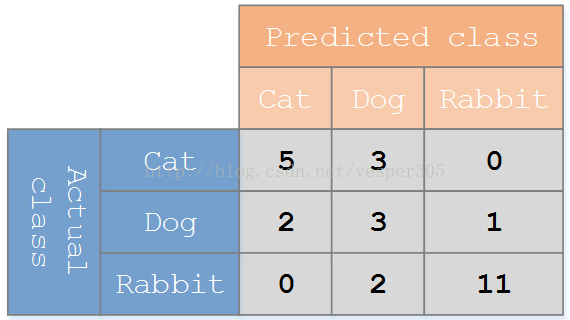

In [301]:
# 混淆举证
## 对角线上的矩阵代表正确的个数，对角线上的值占总数越大，代表分类效果越好。
## 其他都是误判的条数
# how to see confusion martix
# https://blog.csdn.net/vesper305/article/details/44927047 混淆矩阵和混淆表
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename ="confusion  matrix.png", width=500, height=500)


In [303]:
#除了根据经验设计参数之外还行要人工调参
#在机器学习中需要人工调参的参数称为超参数，比如说随机森林里面决策树的个数
#GradSearch暴力搜索，适合小数据集

#选择调参种类
param_rfc = {
            "n_estimators": [10,20,30,40,50,60,70,80,90,100,150,200],
            "criterion": ["gini", "entropy"]
            }

#取得最佳组合参数的组合
grid_rfc = GridSearchCV(rfc, param_rfc, iid = False, cv = 5)
## rfc estimatorestimator object ,这里的rfc是一个随机森林estamitor
grid_rfc.fit(X_train, y_train)
best_param_rfc = grid_rfc.best_params_ 
print(best_param_rfc)

#用最佳组合进行参数设定
rfc = RandomForestClassifier(n_estimators = best_param_rfc['n_estimators'], criterion = best_param_rfc['criterion'], random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

{'criterion': 'gini', 'n_estimators': 30}
[[ 15   0  17]
 [  0   1  10]
 [ 14   0 215]]


# 第五周Python便携数据获取与预处理
数据收集》数据探索与预处理（数据清洗、数据变换、数据规约）》数据分析与挖掘》结果评价》呈现
## 5.1 数据的收集
1. 本地数据
    1. txt文本打开
    2. .csv文件打开
    3. .xlsx文件打开
    4. 数据库打开
2. 网络数据
    1. API获取数据
    2. 一些模块库自带
        1. sklearn模块的datasets
        2. NLTK语料库
3. 从网络爬取到本地
    1. 爬虫

## 5.2 结果展示
    1. Matplotlib绘图
        * 主要用于二维绘图
        * 绘图质量高
    2. pandas绘图
    3. seaborn绘图
    4. pyechart绘图
## 5.3 数据探索与预处理
    1. 数据探索
        * 检查数据错误
        * 了解数据分布特征和内在规律
    2. 数据预处理
        * 数据清洗 Data cleaning
        * 数据集成 Data integration
        * 数据变换 Data transformation
        * 数据规约 Data reduction
    3. 数据清洗
        * 缺失值处理
        * 异常值处理
## 5.4 数据预处理之数据变换-把数据变换成合适的形式
    1. 规范化
        1. 解决哪些影响？
            * 量纲不同
            * 数值范围差异大
        2. 规范化常用方法
            * 最小-最大规范化
            * z-score规范化
            * 小数定标规范化
    2. 连续属性离散化
        1. 方法：
            * 分箱（binning）：等宽法，等频法
            * 聚类
    3. 特征二值化binarization
## 5.5 数据预处理之数据规约
    1. 目的：对属性和数值进行规约获得一个比原数据集的小的多的规约表示，但仍接近原数据的完整性，在规约后数据集上挖掘可产生近乎相同的分析结果
    2. 属性规约：向前选择，向后删除，决策树，PCA
    3. 数值规约：有参方法（回归法，对数线性模型），无参法（直方图，聚类，抽样）
        